# Linear SVC Assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

from sklearn.preprocessing import MinMaxScaler, StandardScaler

### Import the admissions data set (admissions.csv).

In [2]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/admissions.csv')
data.head()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research,Admitted
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


### Split the data into training and test sets, with the test set comprising 30% of the data.  Use `'Admitted'` as the target.

In [3]:
X = data.drop('Admitted', 1)
y = data.Admitted

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [4]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Generate an SVC model with a linear kernel. Set the regularization parameter (C) = 10. Check the score for both train and test sets. 

In [5]:
def get_scores(model, X_train, X_test, y_train, y_test, verbose=False):
  if verbose:
    print(f'Training Scores: {model.score(X_train, y_train)}')
    print(f'Test Scores: {model.score(X_test, y_test)}')
  return model.score(X_train, y_train), model.score(X_test, y_test)

In [6]:
svm = SVC(C=10, kernel='linear')
svm.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
get_scores(svm, X_train, X_test, y_train, y_test, verbose=True)

Training Scores: 0.875
Test Scores: 0.8916666666666667


(0.875, 0.8916666666666667)

In [8]:
svm_scaled = SVC(C=10, kernel='linear')
svm_scaled.fit(X_train_scaled, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [9]:
get_scores(svm_scaled, X_train_scaled, X_test_scaled, y_train, y_test, verbose=True)

Training Scores: 0.8714285714285714
Test Scores: 0.8583333333333333


(0.8714285714285714, 0.8583333333333333)

### Choose some other values for C and show the difference between the scores for the train and test sets.

In [10]:
C_list = np.logspace(-5, 9, 15)
train_list = []
test_list = []
for C in C_list:
  svm = SVC(C=C, kernel='linear')
  svm.fit(X_train, y_train)
  train, test = get_scores(svm, X_train, X_test, y_train, y_test)
  train_list.append(train)
  test_list.append(test)
  # train_list.append(svm.score(X_train, y_train))
  # test_list.append(svm.score(X_test, y_test))

In [11]:
svm_df = pd.DataFrame({'C_list': C_list, 'train_score':train_list, 'test_score':test_list})
svm_df

,C_list,train_score,test_score
0,1.000000e-05,0.617857,0.616667
1,1.000000e-04,0.821429,0.800000
2,1.000000e-03,0.817857,0.816667
3,1.000000e-02,0.853571,0.825000
4,1.000000e-01,0.860714,0.850000
5,1.000000e+00,0.878571,0.858333
6,1.000000e+01,0.875000,0.891667
7,1.000000e+02,0.853571,0.891667
8,1.000000e+03,0.857143,0.866667
9,1.000000e+04,0.853571,0.858333


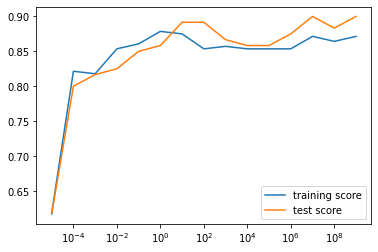

In [12]:
plt.plot(C_list, train_list, label='training score')
plt.plot(C_list, test_list, label='test score')
plt.xscale('log')
plt.legend()
plt.show()

In [13]:
svm = SVC(kernel='linear')

params = {'C': C_list}

svm_grid = GridSearchCV(svm, param_grid=params, cv=5)

svm_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08, 1.e+09])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [14]:
svm_grid.best_estimator_

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
get_scores(svm_grid, X_train, X_test, y_train, y_test, verbose=True)

Training Scores: 0.8785714285714286
Test Scores: 0.8583333333333333


(0.8785714285714286, 0.8583333333333333)

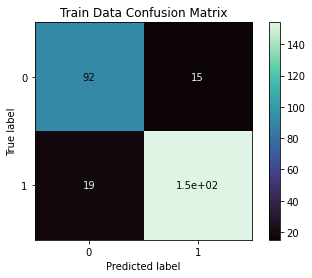

In [16]:
cmap = sns.color_palette("mako", as_cmap=True)
plot_confusion_matrix(svm_grid, X_train, y_train, cmap=cmap)
plt.title('Train Data Confusion Matrix')
plt.show()

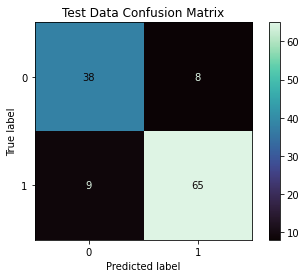

In [17]:
cmap = sns.color_palette("mako", as_cmap=True)
plot_confusion_matrix(svm_grid, X_test, y_test, cmap=cmap)
plt.title('Test Data Confusion Matrix')
plt.show()

### What if we switched up the target variable? Let assume that we know whether a student was admitted. Let's try to predict what their SchoolRank was. 

Create an SVC model with a linear kernel with the SchoolRank field as the target variable. Report both the train and the test scores.

In [18]:
X = data.drop('SchoolRank', 1)
y = data.SchoolRank

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
svm = SVC(kernel='linear')

params = {'C': C_list}

svm_grid = GridSearchCV(svm, param_grid=params, cv=5)

svm_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08, 1.e+09])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [21]:
svm_grid.best_estimator_

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
get_scores(svm_grid, X_train, X_test, y_train, y_test, verbose=True)

Training Scores: 0.628125
Test Scores: 0.525


(0.628125, 0.525)

In [23]:
svm_scaled = SVC(kernel='linear')

params = {'C': [10]}

svm_grid_scaled = GridSearchCV(svm_scaled, param_grid=params, cv=5)

svm_grid_scaled.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None, param_grid={'C': [10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [24]:
svm_grid_scaled.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
get_scores(svm_grid_scaled, X_train_scaled, X_test_scaled, y_train, y_test, verbose=True)

Training Scores: 0.6375
Test Scores: 0.5375


(0.6375, 0.5375)

### Show confusion matrices for the training and test sets, and a classification report for the test set. What trends do you notice?

In [26]:
y_pred_train = svm_grid.predict(X_train)
y_pred_test = svm_grid.predict(X_test)

In [27]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       1.00      0.19      0.32        21
           2       0.64      0.70      0.67        87
           3       0.64      0.82      0.72       107
           4       0.53      0.37      0.43        57
           5       0.61      0.56      0.59        48

    accuracy                           0.63       320
   macro avg       0.68      0.53      0.55       320
weighted avg       0.64      0.63      0.61       320



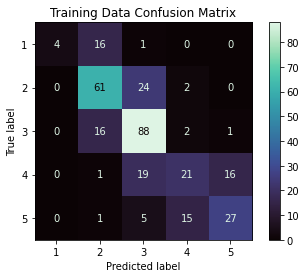

In [28]:
cmap = sns.color_palette("mako", as_cmap=True)
plot_confusion_matrix(svm_grid, X_train, y_train, cmap=cmap)
plt.title('Training Data Confusion Matrix')
plt.show()

In [29]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.47      0.70      0.56        20
           3       0.59      0.62      0.60        26
           4       0.56      0.29      0.38        17
           5       0.50      0.58      0.54        12

    accuracy                           0.53        80
   macro avg       0.42      0.44      0.42        80
weighted avg       0.50      0.53      0.50        80



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


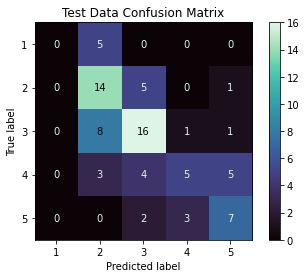

In [30]:
cmap = sns.color_palette("mako", as_cmap=True)
plot_confusion_matrix(svm_grid, X_test, y_test, cmap=cmap)
plt.title('Test Data Confusion Matrix')
plt.show()

Using One Vs One

In [31]:
svm = SVC(kernel='linear', decision_function_shape='ovo')

params = {'C': C_list}

svm_grid = GridSearchCV(svm, param_grid=params, cv=5)

svm_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovo', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08, 1.e+09])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [32]:
svm_grid.best_estimator_

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
get_scores(svm_grid, X_train, X_test, y_train, y_test, verbose=True)

Training Scores: 0.628125
Test Scores: 0.525


(0.628125, 0.525)

In [34]:
y_pred_train = svm_grid.predict(X_train)
y_pred_test = svm_grid.predict(X_test)

In [35]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       1.00      0.19      0.32        21
           2       0.64      0.70      0.67        87
           3       0.64      0.82      0.72       107
           4       0.53      0.37      0.43        57
           5       0.61      0.56      0.59        48

    accuracy                           0.63       320
   macro avg       0.68      0.53      0.55       320
weighted avg       0.64      0.63      0.61       320



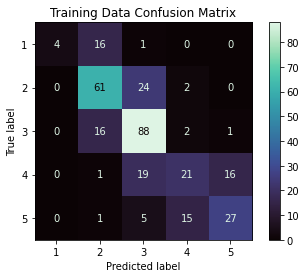

In [36]:
cmap = sns.color_palette("mako", as_cmap=True)
plot_confusion_matrix(svm_grid, X_train, y_train, cmap=cmap)
plt.title('Training Data Confusion Matrix')
plt.show()

In [37]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.47      0.70      0.56        20
           3       0.59      0.62      0.60        26
           4       0.56      0.29      0.38        17
           5       0.50      0.58      0.54        12

    accuracy                           0.53        80
   macro avg       0.42      0.44      0.42        80
weighted avg       0.50      0.53      0.50        80



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


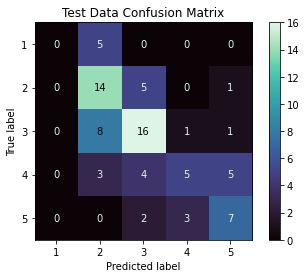

In [38]:
plot_confusion_matrix(svm_grid, X_test, y_test, cmap='mako')
plt.title('Test Data Confusion Matrix')
plt.show()